In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset (replace 'your_dataset.csv' with your actual file path)
from google.colab import files
uploaded = files.upload()  # Use this to upload the file

# Assuming the dataset is in CSV format
df = pd.read_csv('/content/Social Meida Dataset.csv')

# Step 3: Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

# Step 4: Check data types and summary of the dataset
print("\nDataset Info:")
df.info()

print("\nStatistical Summary of the dataset:")
df.describe()


Saving Social Meida Dataset.csv to Social Meida Dataset (1).csv
First 5 rows of the dataset:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Consumer ID                     300 non-null    int64  
 1   Customer Name                   300 non-null    object 
 2   Age                             300 non-null    int64  
 3   Gender                          300 non-null    object 
 4   Income (USD)                    300 non-null    int64  
 5   Education Level                 300 non-null    object 
 6   Social Media Usage (Hours/Day)  300 non-null    float64
 7   Social Media Platforms          300 non-null    object 
 8   Influence Level                 300 non-null    object 
 9   Purchase Decision               300 non-null    object 
 10  Product Category                285 non-null    ob

,Consumer ID,Age,Income (USD),Social Media Usage (Hours/Day),Amount Spent (USD)
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,29.483333,55466.666667,2.724000,183.733333
std,86.746758,3.298381,8462.521479,0.440914,261.520948
min,1.000000,22.000000,32000.000000,1.800000,0.000000
25%,75.750000,27.000000,51000.000000,2.475000,30.000000
50%,150.500000,29.000000,55000.000000,2.700000,65.000000
75%,225.250000,32.000000,62000.000000,2.900000,200.000000
max,300.000000,45.000000,80000.000000,5.000000,1200.000000


In [ ]:
# Step 1: Checking for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

# Step 2: Handling missing values
# Option 1: Drop rows with missing values (you can adjust this if needed)
df_cleaned = df.dropna()

# Option 2: Alternatively, you can fill missing values with a specific value or strategy
# df_cleaned = df.fillna({'column_name': 'default_value'})  # Example for filling missing values

print("\nData after handling missing values:")
df_cleaned.info()

# Step 3: Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

print("\nData after removing duplicates:")
df_cleaned.info()

# Step 4: Checking for inconsistencies in categorical values (Example: 'Gender')
print("\nUnique values in Gender column:")
print(df_cleaned['Gender'].unique())

# You can apply similar checks for other categorical columns like 'Social Media Platforms', 'Product Category', etc.


Missing values in each column:
Consumer ID                        0
Customer Name                      0
Age                                0
Gender                             0
Income (USD)                       0
Education Level                    0
Social Media Usage (Hours/Day)     0
Social Media Platforms             0
Influence Level                    0
Purchase Decision                  0
Product Category                  15
Specific Product                  15
Amount Spent (USD)                 0
Brand Name                        15
City                               0
dtype: int64

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Consumer ID                     285 non-null    int64  
 1   Customer Name                   285 non-null    object 
 2   Age            

In [ ]:
# Check the column names in the dataset
print("Available columns in the dataset:")
print(df_cleaned.columns)


Available columns in the dataset:
Index(['Consumer ID', 'Customer Name', 'Age', 'Gender', 'Income (USD)',
       'Education Level', 'Social Media Usage (Hours/Day)',
       'Social Media Platforms', 'Influence Level', 'Purchase Decision',
       'Product Category', 'Specific Product', 'Amount Spent (USD)',
       'Brand Name', 'City', 'Influence Level Numeric'],
      dtype='object')


In [ ]:
# Check for missing values in the 'Social Media Usage (Hours/Day)' and 'Influence Level Numeric' columns
print("Missing values in 'Social Media Usage (Hours/Day)':")
print(df_cleaned['Social Media Usage (Hours/Day)'].isnull().sum())

print("\nMissing values in 'Influence Level Numeric':")
print(df_cleaned['Influence Level Numeric'].isnull().sum())

# Display unique values in 'Social Media Usage (Hours/Day)' to check for non-numeric or invalid entries
print("\nUnique values in 'Social Media Usage (Hours/Day)':")
print(df_cleaned['Social Media Usage (Hours/Day)'].unique())


Missing values in 'Social Media Usage (Hours/Day)':
0

Missing values in 'Influence Level Numeric':
285

Unique values in 'Social Media Usage (Hours/Day)':
[2.5 1.8 3.2 2.  3.5 2.2 3.  2.8 2.7 2.3 3.8 2.9 3.1 4.2 2.6 2.4 2.1]


In [ ]:
# Step 1: Check the unique values in the 'Influence Level' column to see if there are unexpected or missing values
print("Unique values in 'Influence Level':")
print(df_cleaned['Influence Level'].unique())

# Step 2: Handling missing values in 'Influence Level'
# Option 1: Drop rows with missing 'Influence Level' (if you want to remove them)
df_cleaned = df_cleaned.dropna(subset=['Influence Level'])

# Option 2: Fill missing 'Influence Level' with a default value (e.g., 'medium' or 'low')
# df_cleaned['Influence Level'].fillna('medium', inplace=True)

# Recalculate the 'Influence Level Numeric' after handling missing values
df_cleaned['Influence Level Numeric'] = df_cleaned['Influence Level'].map(influence_mapping)

# Recalculate Engagement Score
df_cleaned['Engagement Score'] = df_cleaned['Social Media Usage (Hours/Day)'] * df_cleaned['Influence Level Numeric']

# Display the updated dataset with the recalculated Engagement Score
print("\nData after handling missing 'Influence Level' and recalculating Engagement Score:")
df_cleaned[['Engagement Score', 'Income Category', 'Purchase Propensity']].head()


Unique values in 'Influence Level':
['Very Influential' 'Somewhat Influential']

Data after handling missing 'Influence Level' and recalculating Engagement Score:


,Engagement Score,Income Category,Purchase Propensity
0,NaN,Low,0
1,NaN,Medium,0
3,NaN,High,0
4,NaN,Medium,0
5,NaN,High,0


In [ ]:
# Step 1: Update the mapping to include 'Very Influential' and 'Somewhat Influential'
influence_mapping = {
    'Very Influential': 3,
    'Somewhat Influential': 2,
    'high': 3,
    'medium': 2,
    'low': 1
}

# Step 2: Recalculate 'Influence Level Numeric' using the updated mapping
df_cleaned['Influence Level Numeric'] = df_cleaned['Influence Level'].map(influence_mapping)

# Step 3: Recalculate 'Engagement Score'
df_cleaned['Engagement Score'] = df_cleaned['Social Media Usage (Hours/Day)'] * df_cleaned['Influence Level Numeric']

# Display the updated dataset with the recalculated Engagement Score
print("\nData after updating 'Influence Level' mapping and recalculating Engagement Score:")
df_cleaned[['Engagement Score', 'Income Category', 'Purchase Propensity']].head()



Data after updating 'Influence Level' mapping and recalculating Engagement Score:


,Engagement Score,Income Category,Purchase Propensity
0,7.5,Low,0
1,3.6,Medium,0
3,9.6,High,0
4,4.0,Medium,0
5,10.5,High,0


Descriptive statistics of new features:
       Engagement Score  Purchase Propensity
count        285.000000                285.0
mean           6.487018                  0.0
std            1.848641                  0.0
min            3.600000                  0.0
25%            5.000000                  0.0
50%            5.600000                  0.0
75%            8.400000                  0.0
max           11.400000                  0.0


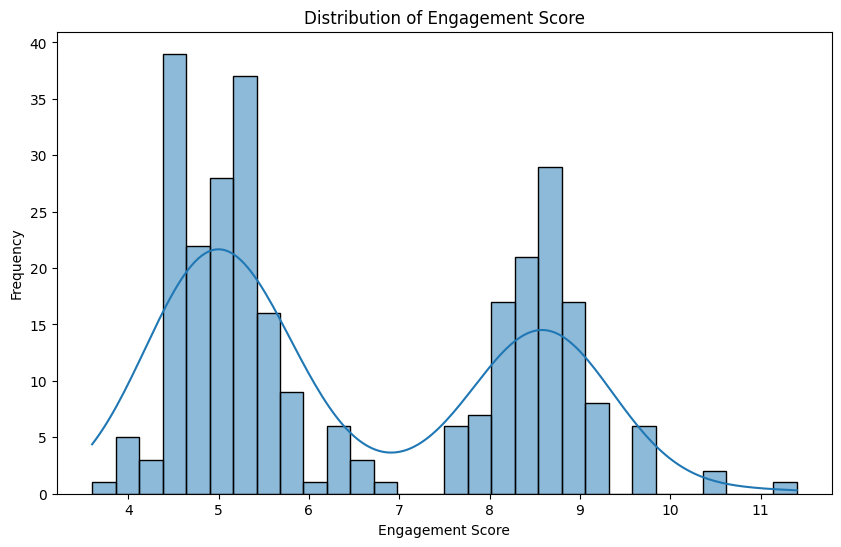

In [ ]:
# Descriptive statistics
print("Descriptive statistics of new features:")
print(df_cleaned[['Engagement Score', 'Income Category', 'Purchase Propensity']].describe())

# Distribution of Engagement Score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Engagement Score'], bins=30, kde=True)
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


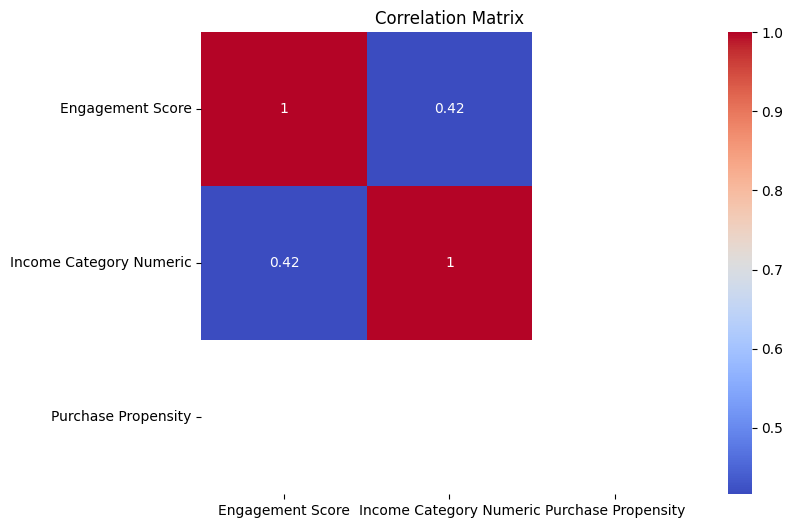

In [ ]:
# Convert 'Income Category' and 'Purchase Propensity' to numerical values
df_cleaned['Income Category Numeric'] = df_cleaned['Income Category'].map({
    'Low': 1,
    'Medium': 2,
    'High': 3
})

# 'Purchase Propensity' is already numerical, so you can keep it as is

# Recalculate the correlation matrix with the new numeric column
correlation_matrix = df_cleaned[['Engagement Score', 'Income Category Numeric', 'Purchase Propensity']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


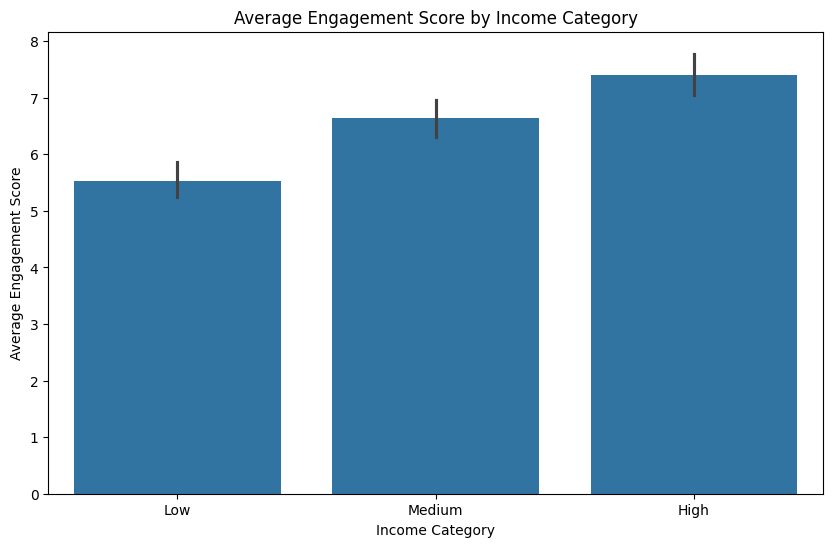

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Average Engagement Score by Income Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Category', y='Engagement Score', data=df_cleaned, estimator=np.mean)
plt.title('Average Engagement Score by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Engagement Score')
plt.show()


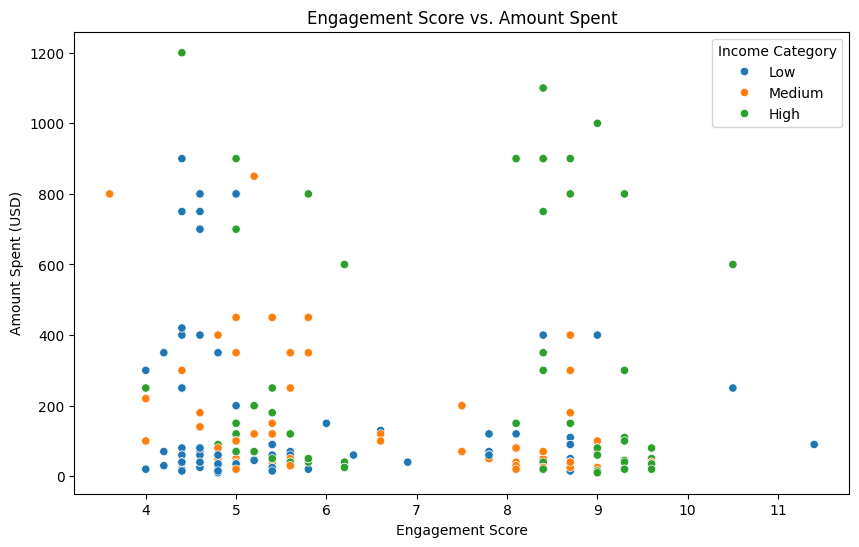

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engagement Score', y='Amount Spent (USD)', data=df_cleaned, hue='Income Category')
plt.title('Engagement Score vs. Amount Spent')
plt.xlabel('Engagement Score')
plt.ylabel('Amount Spent (USD)')
plt.legend(title='Income Category')
plt.show()


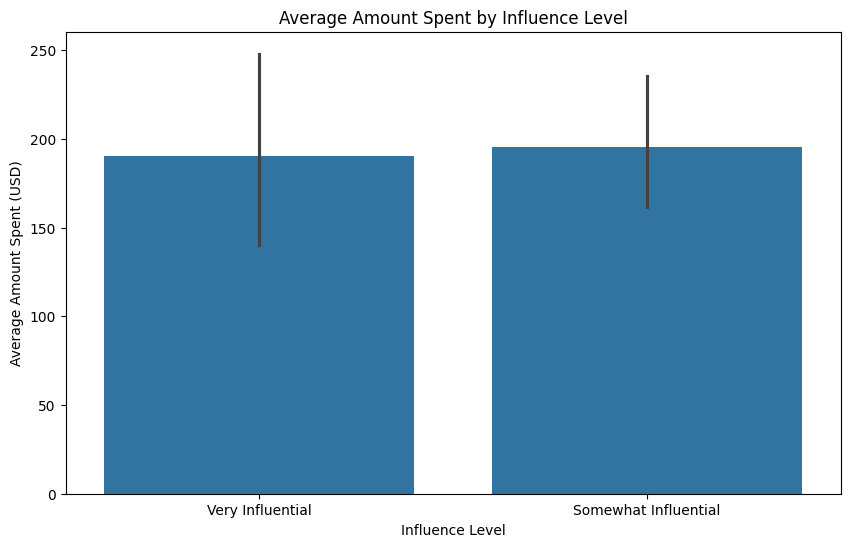

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Influence Level', y='Amount Spent (USD)', data=df_cleaned, estimator=np.mean)
plt.title('Average Amount Spent by Influence Level')
plt.xlabel('Influence Level')
plt.ylabel('Average Amount Spent (USD)')
plt.show()


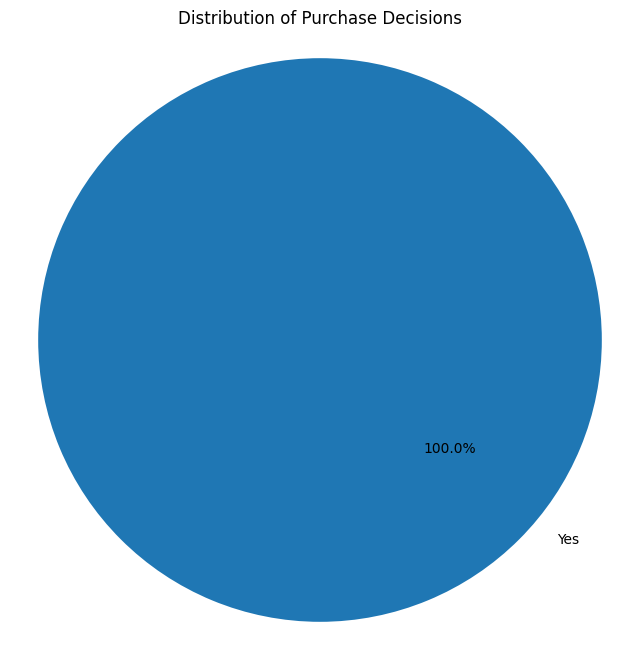

In [ ]:
purchase_decision_counts = df_cleaned['Purchase Decision'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(purchase_decision_counts, labels=purchase_decision_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Decisions')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Drop irrelevant columns
df_relevant = df_cleaned.drop(columns=['Consumer ID', 'Customer Name'])

# Check the data types to identify non-numeric columns
print(df_relevant.dtypes)

# List of categorical columns that need encoding
categorical_cols = ['Gender', 'Education Level', 'Social Media Platforms',
                    'Purchase Decision', 'Product Category',
                    'Specific Product', 'Brand Name', 'City']

# Perform One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df_relevant,
                             columns=categorical_cols,
                             drop_first=True)

# Ensure Income Category is treated as numeric
df_encoded['Income Category Numeric'] = df_encoded['Income Category Numeric'].astype(float)

# Separate features and target variable
X = df_encoded.drop(columns=['Amount Spent (USD)'])  # Drop target variable
y = df_encoded['Amount Spent (USD)']

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)

# Print out predictions for inspection
print(predictions)




Age                                    int64
Gender                                object
Income (USD)                           int64
Education Level                       object
Social Media Usage (Hours/Day)       float64
Social Media Platforms                object
Purchase Decision                     object
Product Category                      object
Specific Product                      object
Amount Spent (USD)                     int64
Brand Name                            object
City                                  object
Influence Level Numeric                int64
Engagement Score                     float64
Purchase Propensity                    int64
Income Category Numeric             category
Income Category_Medium                  bool
Income Category_High                    bool
Influence Level_Very Influential        bool
dtype: object
[158.5    28.95   19.85   97.8   302.     72.45   40.5    76.5    87.35
  33.6    60.75   16.7   874.6    33.6    57.05  293.     4

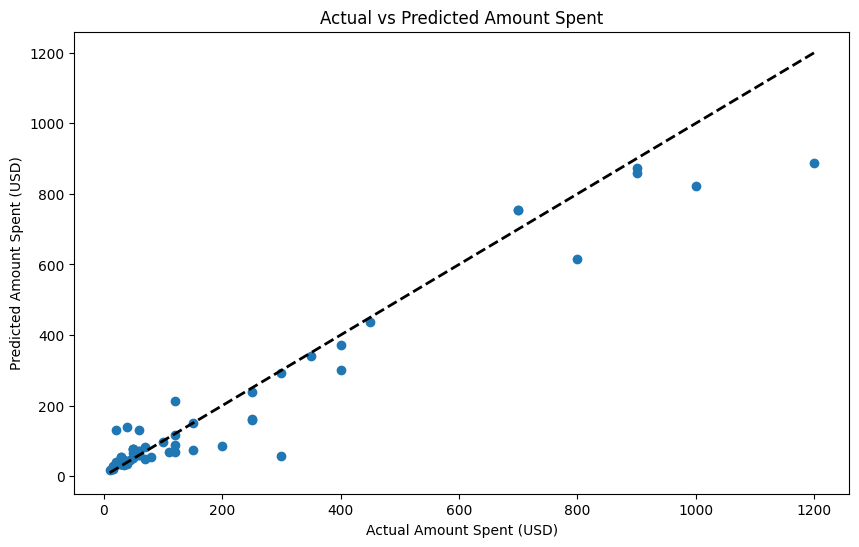

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Amount Spent (USD)')
plt.ylabel('Predicted Amount Spent (USD)')
plt.title('Actual vs Predicted Amount Spent')
plt.show()


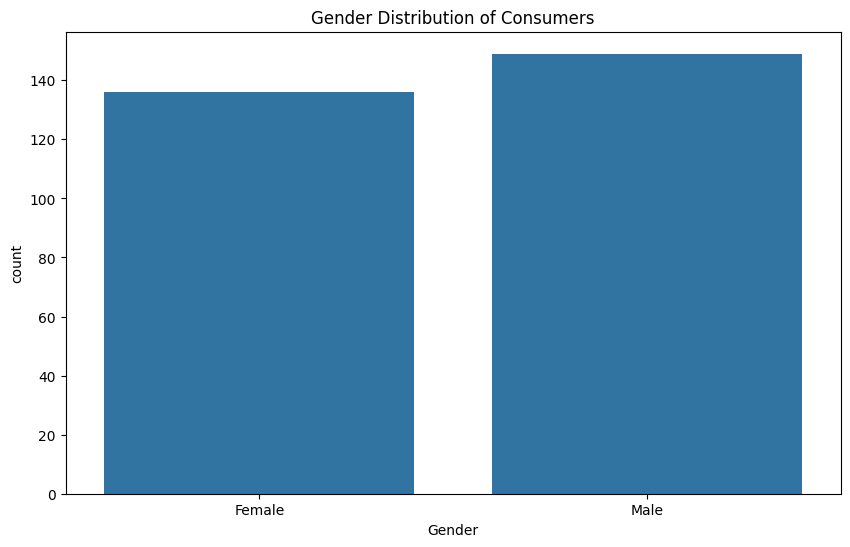

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


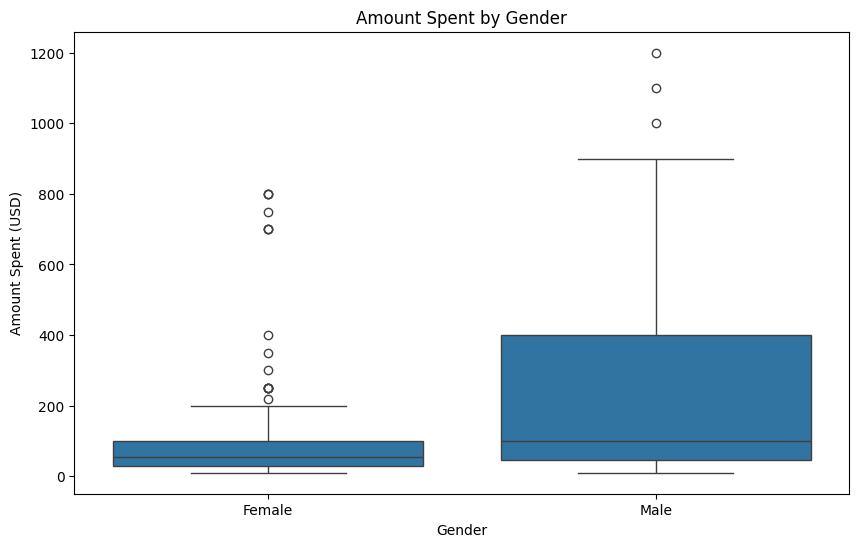

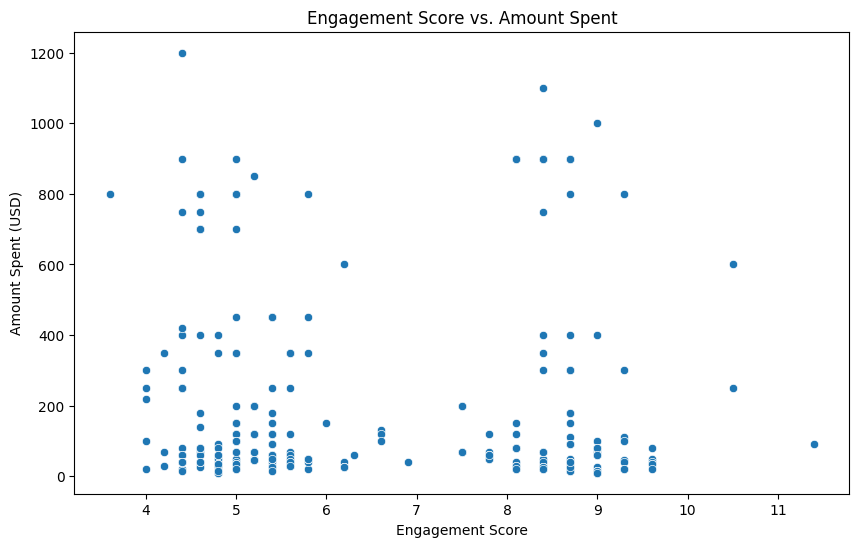

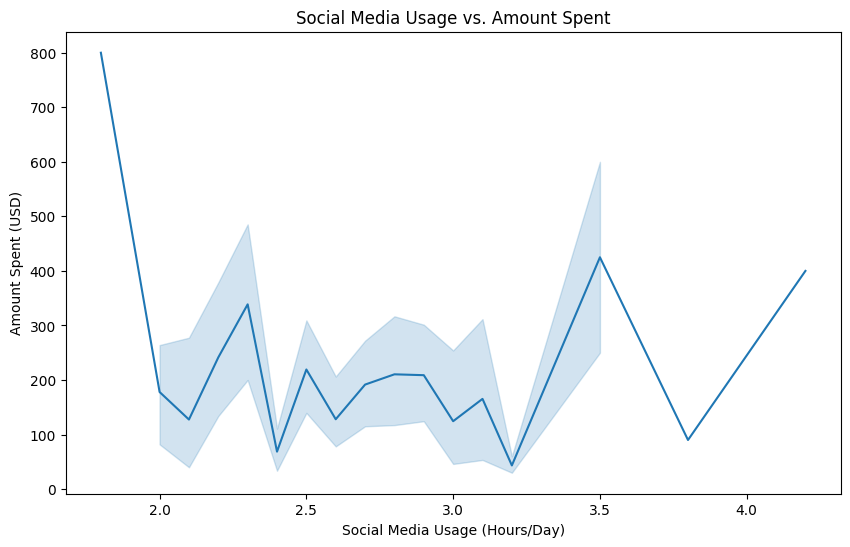

ValueError: could not convert string to float: 'Alice Johnson'

<Figure size 1200x800 with 0 Axes>

In [ ]:


# 1. Bar Chart for Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution of Consumers')
plt.show()

# 2. Box Plot for Amount Spent by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Amount Spent (USD)', data=df_cleaned)
plt.title('Amount Spent by Gender')
plt.show()

# 3. Scatter Plot for Engagement Score vs. Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engagement Score', y='Amount Spent (USD)', data=df_cleaned)
plt.title('Engagement Score vs. Amount Spent')
plt.show()

# 4. Line Chart for Social Media Usage vs. Amount Spent
plt.figure(figsize=(10, 6))
sns.lineplot(x='Social Media Usage (Hours/Day)', y='Amount Spent (USD)', data=df_cleaned)
plt.title('Social Media Usage vs. Amount Spent')
plt.show()

# 5. Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
n